In [2]:
!pip3 install tensorflow-gpu==1.13.1

     |████████████████████████████████| 345.2MB 39kB/s 
     |████████████████████████████████| 3.2MB 47.6MB/s 
     |████████████████████████████████| 368kB 55.5MB/s 
ERROR: tensorflow 2.2.0rc3 has requirement tensorboard<2.3.0,>=2.2.0, but you'll have tensorboard 1.13.1 which is incompatible.
ERROR: tensorflow 2.2.0rc3 has requirement tensorflow-estimator<2.3.0,>=2.2.0rc0, but you'll have tensorflow-estimator 1.13.0 which is incompatible.
  Found existing installation: tensorboard 2.2.1
    Uninstalling tensorboard-2.2.1:
      Successfully uninstalled tensorboard-2.2.1
  Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorflow-estimator-2.2.0


In [0]:
tf.__version__

NameError: ignored

In [2]:
import tensorflow as tf
hello = tf.constant('Hello, TensorFlow!')
sess = tf.Session()
print(sess.run(hello))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

b'Hello, TensorFlow!'


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# import libraries required for the mask_rcnn library
%cd /content/drive/My Drive/Mask_RCNN/deepfashion-project/Mask_RCNN
!pip3 install -r 'requirements.txt'
!python setup.py install

/content/drive/My Drive/Mask_RCNN/deepfashion-project/Mask_RCNN
     |████████████████████████████████| 421.8MB 35kB/s 
     |████████████████████████████████| 3.9MB 46.7MB/s 
     |████████████████████████████████| 450kB 52.3MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=ec390af65b7ffb51faefaaf7fb3761f696b75ce443f464c2ee3e956a07561b3c
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
  Found existing installation: tensorboard 1.13.1
    Uninstalling tensorboard-1.13.1:
      Successfully uninstalled tensorboard-1.13.1
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorflow-estimator 1.13.0
    Uninstalling tensorflow-estimator-1.13.0:
      Successfully uninstalled tensorflow-estimator-1.13.0
running install
running bdist_egg
running egg_info
writing mask_rcnn.egg-info

In [4]:
import os
import sys
import json
import random
import math
import re
import time
import numpy as np
import cv2
import matplotlib
import matplotlib.pyplot as plt
import skimage.draw
import tensorflow as tf

# Root directory of the project
ROOT_DIR = '/content/drive/My Drive/Mask_RCNN/deepfashion-project/Mask_RCNN'
# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn.config import Config
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
from mrcnn.model import log

%matplotlib inline

# GPU checks
print("Using GPU: " + str(tf.test.is_gpu_available()))
print("GPU name: " + str(tf.test.gpu_device_name()))

# Hide some tensorflaw warning messages
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

Using GPU: True
GPU name: /device:GPU:0


In [5]:
from mrcnn.config import Config
class FashionConfig(Config):
    """Configuration for training on the deepfashion2 dataset.
    Derives from the base Config class and overrides values specific
    to deepfashion2 dataset.
    """
    # Give the configuration a recognizable name
    NAME = "fashion"

    # Train on 1 GPU and 8 images per GPU. We can put multiple images on each
    # GPU because the images are small. Batch size is 8 (GPUs * images/GPU).
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

    # Number of classes (including background)
    NUM_CLASSES = 1 + 13  # background + 3 shapes

    # Use small images for faster training. Set the limits of the small side
    # the large side, and that determines the image shape.
    IMAGE_MIN_DIM = 128
    IMAGE_MAX_DIM = 128

    # Use smaller anchors because our image and objects are small
    RPN_ANCHOR_SCALES = (8, 16, 32, 64, 128)  # anchor side in pixels

    # Reduce training ROIs per image because the images are small and have
    # few objects. Aim to allow ROI sampling to pick 33% positive ROIs.
    TRAIN_ROIS_PER_IMAGE = 32

    # Use a small epoch since the data is simple
    STEPS_PER_EPOCH = 100

    # use small validation steps since the epoch is small
    VALIDATION_STEPS = 5

config = FashionConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  128
IMAGE_META_SIZE                26
IMAGE_MIN_DIM                  128
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [128 128   3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE             

## Notebook Preferences

In [0]:
def get_ax(rows=1, cols=1, size=8):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Change the default size attribute to control the size
    of rendered images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax

## Dataset

Create a synthetic dataset

Extend the Dataset class and add a method to load the deepfashion2 dataset, `load_fashion()`, and override the following methods:

* load_image()
* load_mask()
* image_reference()

In [0]:
import os
import json
import numpy as np
import skimage.draw
from mrcnn import utils

class FashionDataset(utils.Dataset):

    def load_fashion(self, dataset_dir, subset):
        """Load a subset of the deepfashion2 dataset.
        dataset_dir: Root directory of the dataset.
        subset: Subset to load: train or val
        """
        # Add classes. We have only one class to add.
        self.add_class("fashion", 1, "short sleeve top")
        self.add_class("fashion", 2, "long sleeve top")
        self.add_class("fashion", 3, "short sleeve outwear")
        self.add_class("fashion", 4, "long sleeve outwear")
        self.add_class("fashion", 5, "vest")
        self.add_class("fashion", 6, "sling")
        self.add_class("fashion", 7, "shorts")
        self.add_class("fashion", 8, "trousers")
        self.add_class("fashion", 9, "skirt")
        self.add_class("fashion", 10, "short sleeve dress")
        self.add_class("fashion", 11, "long sleeve dress")
        self.add_class("fashion", 12, "vest dress")
        self.add_class("fashion", 13, "sling dress")

        # Train or validation dataset?
        assert subset in ["train", "val"]
        dataset_dir = os.path.join(dataset_dir, subset)
        dataset_dir_image = os.path.join(dataset_dir, 'image')
        dataset_dir_annos = os.path.join(dataset_dir, 'annos_preprocessed')
        
        """
        [
            {
                id,
                width,
                height,
                clothes: [
                    {
                        category_id,
                        segmentations: [
                            {
                                all_x_points: [],
                                all_y_points: [],
                            }
                        ],
                        landmark: {
                            'all_x_points': [],
                            'all_y_points': [],
                            'all_v_points': [],
                        }
                    }
                ]
            }
        ]
        """
        
        
        annotations = json.load(open(os.path.join(dataset_dir_annos, 'annotations.json')))

        # Add images
        for annotation in annotations:
            image_id = annotation['id']
            image_path = os.path.join(dataset_dir_image, image_id + '.jpg')
            
            self.add_image(
                "fashion",
                image_id=image_id,  # use file name as a unique image id
                path=image_path,
                width=annotation['width'],
                height=annotation['height'],
                clothes=annotation['clothes']
            )

    def load_mask(self, image_id):
        """Generate instance masks for an image.
       Returns:
        masks: A bool array of shape [height, width, instance count] with
            one mask per instance.
        landmarks: A int array of shape [height, width, instance count] with
            one landmark per instance.
        class_ids: a 1D array of class IDs of the instance masks.
        """
        # If not a fashion dataset image, delegate to parent class.
        image_info = self.image_info[image_id]
        if image_info["source"] != "fashion":
            return super(self.__class__, self).load_mask(image_id)

        # Convert segmentations to a bitmap mask of shape
        # [height, width, instance_count]
        info = self.image_info[image_id]
        mask = np.zeros([info["height"], info["width"], len(info["clothes"])],
                        dtype=np.uint8)
        landmark = np.zeros([info["height"], info["width"], len(info["clothes"])],
                dtype=np.uint8)
        class_ids = np.zeros(len(info['clothes']), dtype=np.uint8)
        for clothing_idx, cloth in enumerate(info["clothes"]):
            class_ids[clothing_idx] = cloth['category_id']
            for segmentation_idx, segmentation in enumerate(cloth['segmentations']):
                # Get indexes of pixels inside the polygon and set them to 1
                rr, cc = skimage.draw.polygon(
                    segmentation['all_y_points'],
                    segmentation['all_x_points'])
                mask[rr, cc, clothing_idx] = 1
            landmark[
                cloth['landmark']['all_y_points'],
                cloth['landmark']['all_x_points'],
                clothing_idx] = cloth['landmark']['all_v_points']

        # Return mask, and array of class IDs of each instance.
        return mask, class_ids, landmark

    def image_reference(self, image_id):
        """Return the path of the image."""
        info = self.image_info[image_id]
        if info["source"] == "fashion":
            return info["path"]
        else:
            super(self.__class__, self).image_reference(image_id)
            
    def load_image(self, image_id):
        info = self.image_info[image_id]
        return skimage.io.imread(info['path'])


In [0]:
dataset_train = FashionDataset()
dataset_train.load_fashion(ROOT_DIR + '/train', "train")
dataset_train.prepare()

dataset_val = FashionDataset()
dataset_val.load_fashion(ROOT_DIR + '/train', "val")
dataset_val.prepare()

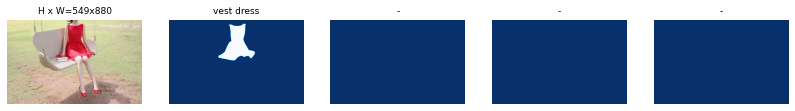

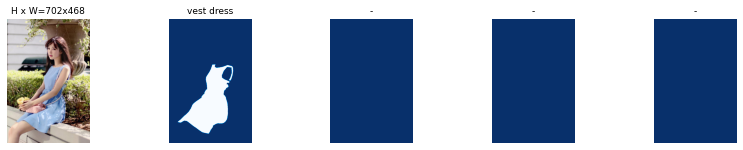

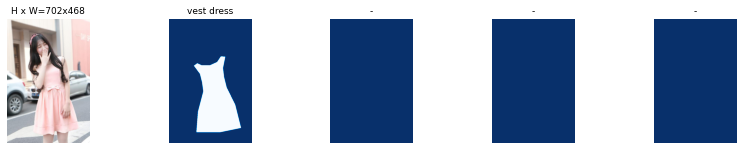

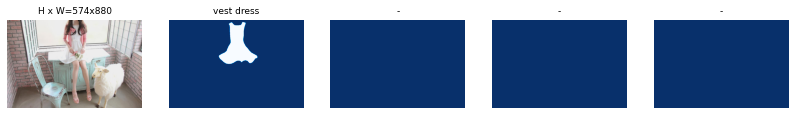

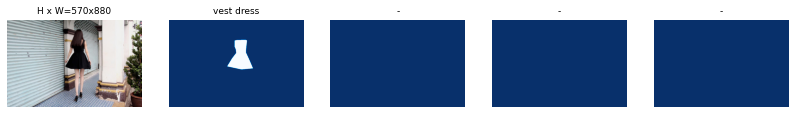

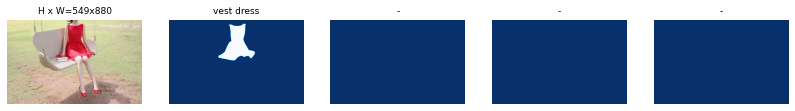

In [24]:
image_ids = np.random.choice(dataset_val.image_ids, 6)
for image_id in image_ids:
    image = dataset_val.load_image(image_id)
    mask, class_ids, landmarks = dataset_val.load_mask(image_id)
    visualize.display_top_masks(image, mask, class_ids, dataset_train.class_names)

## Create model

In [10]:
# Create model in training mode
model = modellib.MaskRCNN(mode="training", config=config,
                          model_dir=MODEL_DIR)

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
tf.__version__

'1.13.1'

In [11]:
init_with = "imagenet"

if init_with == "imagenet":
    model.load_weights(model.get_imagenet_weights(), by_name=True)
elif init_with == "last":
    # Load the last model you trained and continue training
    model.load_weights(model.find_last(), by_name=True)

94658560/94653016 [==============================] - 2s 0us/step


## Training

Train in two stages:
1. Only the heads. Here we're freezing all the backbone layers and training only the randomly initialized layers (i.e. the ones that we didn't use pre-trained weights from Imagenet). To train only the head layers, pass `layers='heads'` to the `train()` function.

2. Fine-tune all layers. For this simple example it's not necessary, but we're including it to show the process. Simply pass `layers="all` to train all layers.

In [12]:
# Train the head branches
# Passing layers="heads" freezes all layers except the head
# layers. You can also pass a regular expression to select
# which layers to train by name pattern.

#Add callbacks for history and early stopping
import keras
earlystop = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='auto')
history = keras.callbacks.History()

model.train(dataset_train, dataset_val,
            learning_rate=config.LEARNING_RATE, 
            epochs=100,
            layers='heads',
            custom_callbacks = [earlystop, history]
)


Starting at epoch 0. LR=0.001

Checkpoint Path: /content/drive/My Drive/Mask_RCNN/deepfashion-project/Mask_RCNN/logs/fashion20200422T1803/mask_rcnn_fashion_{epoch:04d}.h5
Selecting layers to train
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
In model:  rpn_model
    rpn_conv_shared        (Conv2D)
    rpn_class_raw          (Conv2D)
    rpn_bbox_pred          (Conv2D)
mrcnn_landmark_conv1   (TimeDistributed)
mrcnn_landmark_bn1     (TimeDistributed)
mrcnn_landmark_conv2   (TimeDistributed)
mrcnn_landmark_bn2     (TimeDistributed)
mrcnn_landmark_conv3   (TimeDistributed)
mrcnn_landmark_bn3     (TimeDistributed)
mrcnn_landmark_conv4   (TimeDistributed)
mrcnn_landmark_bn4     (TimeDistributed)
mrcnn_mask_conv1       (TimeDistributed)
mrcnn_landmark_conv5   (TimeDistributed)
mrcnn_m

/usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/gradients_impl.py:110: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/usr/local/lib/python3.6/dist-packages/keras/engine/training_generator.py:49: UserWarning: Using a generator with `use_multiprocessing=True` and multiple workers may duplicate your data. Please consider using the `keras.utils.Sequence class.
  UserWarning('Using a generator with `use_multiprocessing=True`'


Epoch 1/100
100/100 [==============================] - 91s 914ms/step - loss: 4.3179 - val_loss: 5.1047
Epoch 2/100
100/100 [==============================] - 41s 413ms/step - loss: 2.8995 - val_loss: 1.7168
Epoch 3/100
100/100 [==============================] - 41s 413ms/step - loss: 2.2789 - val_loss: 2.8937
Epoch 4/100
100/100 [==============================] - 42s 421ms/step - loss: 1.7226 - val_loss: 1.1901
Epoch 5/100
100/100 [==============================] - 58s 578ms/step - loss: 1.2723 - val_loss: 0.6768
Epoch 6/100
100/100 [==============================] - 55s 547ms/step - loss: 1.2907 - val_loss: 0.8719
Epoch 7/100
100/100 [==============================] - 57s 573ms/step - loss: 0.9901 - val_loss: 0.5190
Epoch 8/100
100/100 [==============================] - 54s 543ms/step - loss: 0.7989 - val_loss: 0.3920
Epoch 9/100
100/100 [==============================] - 55s 551ms/step - loss: 0.6877 - val_loss: 0.3600
Epoch 10/100
100/100 [==============================] - 56s 556m

In [0]:
!pip3 uninstall tensorflow

Uninstalling tensorflow-2.2.0rc3:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.6/dist-packages/tensorflow-2.2.0rc3.dist-info/*
    /usr/local/lib/python3.6/dist-packages/tensorflow/*
  Would not remove (might be manually added):
    /usr/local/lib/python3.6/dist-packages/tensorflow/_api/v1/__init__.py
    /usr/local/lib/python3.6/dist-packages/tensorflow/_api/v1/app/__init__.py
    /usr/local/lib/python3.6/dist-packages/tensorflow/_api/v1/autograph/__init__.py
    /usr/local/lib/python3.6/dist-packages/tensorflow/_api/v1/autograph/experimental/__init__.py
    /usr/local/lib/python3.6/dist-packages/tensorflow/_api/v1/bitwise/__init__.py
    /usr/local/lib/python3.6/dist-packages/tensorflow/_api/v1/compat/__init__.py
    /usr/local/lib/python3.6/dist-packag

In [0]:
tf.__version__

'1.13.1'

In [0]:
!pip3 show tensorflow-gpu


Name: tensorflow-gpu
Version: 1.13.1
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: opensource@google.com
License: Apache 2.0
Location: /usr/local/lib/python3.6/dist-packages
Requires: keras-preprocessing, six, termcolor, absl-py, tensorflow-estimator, grpcio, protobuf, tensorboard, keras-applications, wheel, numpy, astor, gast
Required-by: 


In [13]:
# Fine tune all layers
# Passing layers="all" trains all layers. You can also 
# pass a regular expression to select which layers to
# train by name pattern.
model.train(dataset_train, dataset_val, 
            learning_rate=config.LEARNING_RATE / 10,
            epochs=2, 
            layers="all")


Starting at epoch 100. LR=0.0001

Checkpoint Path: /content/drive/My Drive/Mask_RCNN/deepfashion-project/Mask_RCNN/logs/fashion20200422T1803/mask_rcnn_fashion_{epoch:04d}.h5
Selecting layers to train
conv1                  (Conv2D)
bn_conv1               (BatchNorm)
res2a_branch2a         (Conv2D)
bn2a_branch2a          (BatchNorm)
res2a_branch2b         (Conv2D)
bn2a_branch2b          (BatchNorm)
res2a_branch2c         (Conv2D)
res2a_branch1          (Conv2D)
bn2a_branch2c          (BatchNorm)
bn2a_branch1           (BatchNorm)
res2b_branch2a         (Conv2D)
bn2b_branch2a          (BatchNorm)
res2b_branch2b         (Conv2D)
bn2b_branch2b          (BatchNorm)
res2b_branch2c         (Conv2D)
bn2b_branch2c          (BatchNorm)
res2c_branch2a         (Conv2D)
bn2c_branch2a          (BatchNorm)
res2c_branch2b         (Conv2D)
bn2c_branch2b          (BatchNorm)
res2c_branch2c         (Conv2D)
bn2c_branch2c          (BatchNorm)
res3a_branch2a         (Conv2D)
bn3a_branch2a          (BatchN

/usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/gradients_impl.py:110: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/usr/local/lib/python3.6/dist-packages/keras/engine/training_generator.py:49: UserWarning: Using a generator with `use_multiprocessing=True` and multiple workers may duplicate your data. Please consider using the `keras.utils.Sequence class.
  UserWarning('Using a generator with `use_multiprocessing=True`'


In [0]:
# Save weights
# Typically not needed because callbacks save after every epoch
# Uncomment to save manually
model_path = os.path.join(MODEL_DIR, "mask_rcnn_fashion.h5")
model.keras_model.save_weights(model_path)model.keras_model.save_weights(model_path)

## Detection

In [14]:
class InferenceConfig(FashionConfig):
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

inference_config = InferenceConfig()

# Recreate the model in inference mode
model = modellib.MaskRCNN(mode="inference", 
                          config=inference_config,
                          model_dir=MODEL_DIR)

# Get path to saved weights
# Either set a specific path or find last trained weights
model_path = os.path.join(ROOT_DIR, ".h5 file name here")
model_path = model.find_last()

# Load trained weights
print("Loading weights from ", model_path)
model.load_weights(model_path, by_name=True)

Instructions for updating:
Use tf.cast instead.
Loading weights from  /content/drive/My Drive/Mask_RCNN/deepfashion-project/Mask_RCNN/logs/fashion20200422T1803/mask_rcnn_fashion_0031.h5
Re-starting from epoch 31


In [1]:
# Test on a random image
image_id = random.choice(dataset_val.image_ids)
original_image, image_meta, gt_class_id, gt_bbox, gt_mask, gt_landmark =\
    modellib.load_image_gt(dataset_val, inference_config, 
                           image_id, use_mini_mask=False)

log("original_image", original_image)
log("image_meta", image_meta)
log("gt_class_id", gt_class_id)
log("gt_bbox", gt_bbox)
log("gt_mask", gt_mask)
log("gt_landmark", gt_landmark)

visualize.display_instances(original_image, gt_bbox, gt_mask, gt_landmark, gt_class_id, 
                            dataset_train.class_names, figsize=(8, 8))

results = model.detect([original_image], verbose=2)

r = results[0]
visualize.display_instances(original_image, r['rois'], r['masks'], r['landmarks'], r['class_ids'], 
                            dataset_val.class_names, r['scores'], ax=get_ax())

NameError: ignored

In [21]:
mask = r['masks']
mask = mask.astype(int)
mask.shape

(128, 128, 1)

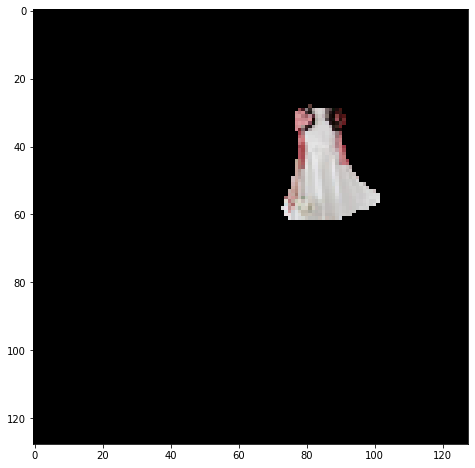

In [23]:
for i in range(mask.shape[2]):
    temp = original_image
    for j in range(temp.shape[2]):
        temp[:,:,j] = temp[:,:,j] * mask[:,:,i]
    plt.figure(figsize=(8,8))
    plt.imshow(temp)

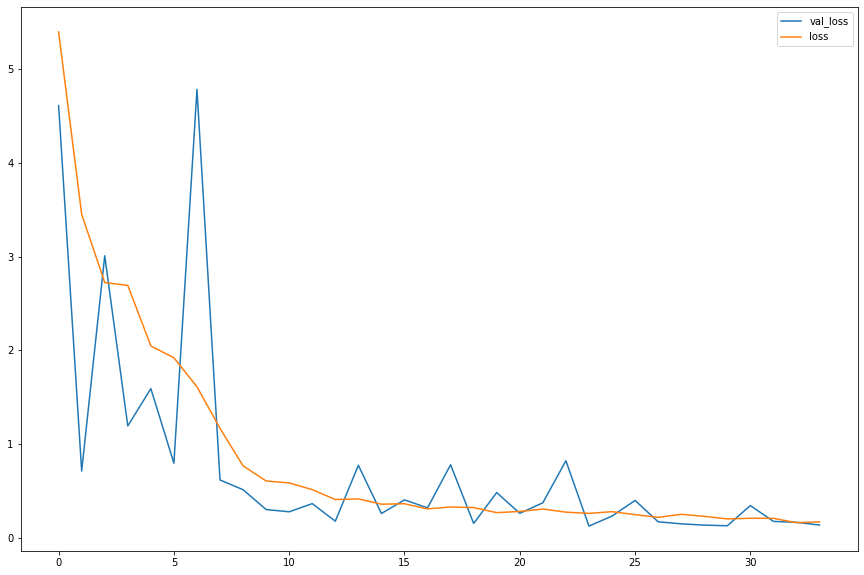

In [0]:
#Some easy visualization
import pandas as pd
import pickle

#Store the history dict
with open('./trainHistoryDict', 'wb') as file_pi:
    pickle.dump(history.history, file_pi)

#Check that it loads
train_history = pickle.load(open( "trainHistoryDict", "rb" ) )

#Convert to a dataframe
df = pd.DataFrame(train_history)

#Show evolution of metrics
fig, ax = plt.subplots(figsize = (15,10))
df.plot(ax = ax)
plt.show()


